# Домашнее задание

## Задача 1
Из начального приближения $$X^0 = (-1, 1)$$ решить задачу безусловной минимизации функции $$f: \mathbb{R}^2 \rightarrow \mathbb{R}, \quad f(x) = 2x_1^2 + x_1 \cdot x_2 + 3x_2^2$$ градиентным методом, используя правило Армихо с параметрами $$\alpha = 1, \quad \epsilon = \theta = \frac{1}{2}$$

Iteration: 0, x^k = [-1  1], f(x^k) = 4
Iteration: 1, x^k = [ 0.5 -1.5], f(x^k) = 6.5
Iteration: 2, x^k = [0.25 2.75], f(x^k) = 23.5
Iteration: 3, x^k = [-0.6875 -1.4375], f(x^k) = 8.1328125
Iteration: 4, x^k = [0.359375 0.890625], f(x^k) = 2.9580078125
Iteration: 5, x^k = [-0.22265625 -0.53515625], f(x^k) = 1.077484130859375
Iteration: 6, x^k = [0.13378906 0.32324219], f(x^k) = 0.3925018310546875
Iteration: 7, x^k = [-0.08081055 -0.19506836], f(x^k) = 0.14297926425933838
Iteration: 8, x^k = [0.04876709 0.11773682], f(x^k) = 0.05208401381969452

Solution: [-0.0294342  -0.07106018]
f(x^k) = 0.018972992431372404
Number of iterations: 10


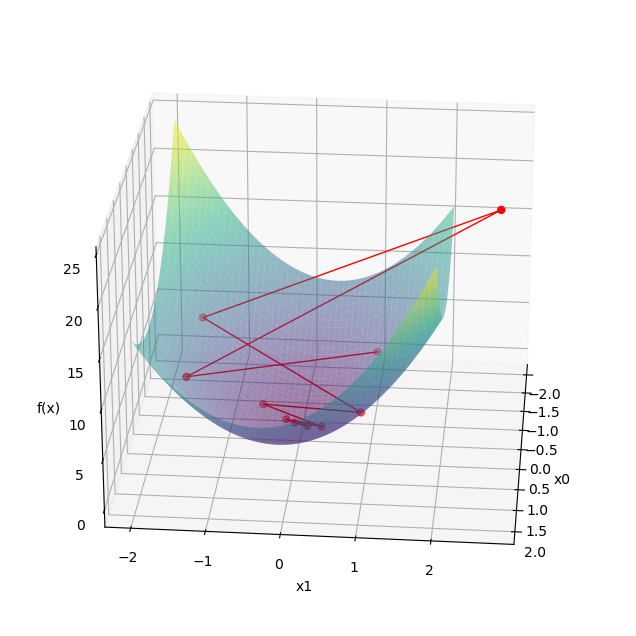

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from autograd import grad

def f(x):
    return 2 * x[0]**2 + x[0] * x[1] + 3 * x[1]**2

def gradient(x):
    dfdx0 = 4 * x[0] + x[1]
    dfdx1 = x[0] + 6 * x[1]
    return np.array([dfdx0, dfdx1])

def armijo_rule(x, alpha, epsilon, teta):
    while not (f(x - alpha * gradient(x)) <= f(x) + epsilon * alpha * np.dot(gradient(x), gradient(x))):
        alpha *= teta
    return alpha

def gradient_descent(X0, alpha, epsilon, teta):
    x = np.array(X0)
    iteration = 0
    max_iterations = 1000
    x_k = [x.copy()]
    
    while np.linalg.norm(gradient(x)) > epsilon and iteration < max_iterations:
        print(f"Iteration: {iteration}, x^k = {x_k[-1]}, f(x^k) = {f(x_k[-1])}")
        alpha = armijo_rule(x, alpha, epsilon, teta)
        x = x - alpha * gradient(x)
        x_k.append(x.copy())
        iteration += 1
    
    return x, iteration, np.array(x_k)

def plot_3d_steps(x_k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
    
    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)
    
    ax.scatter(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", marker="o", s=25)
    
    ax.plot(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", linewidth=1)
    
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("f(x)")
    
    ax.view_init(elev=25, azim=5)
    
    plt.show()

X0 = [-1, 1]
alpha = 1
epsilon = 0.5 #1e-9
teta = 0.5

solution, iterations, x_k = gradient_descent(X0, alpha, epsilon, teta)
print("\nSolution:", solution)
print(f"f(x^k) = {f(x_k[-1])}")
print("Number of iterations:", iterations+1)

plot_3d_steps(x_k)


## Задача 2
Из начального приближения $$X^0 = (1, 1)$$ решить задачу безусловной минимизации функции $$f: \mathbb{R}^2 \rightarrow \mathbb{R}, \quad f(x) = x_1^2 + e^{x_2^2}$$ методом Ньютона.

Iteration: 0, x^k = [1 1], f(x^k) = 3.718281828459045
Iteration: 1, x^k = [0.         0.66666667], f(x^k) = 1.5596234976067809
Iteration: 2, x^k = [0.         0.31372549], f(x^k) = 1.103430190918429
Iteration: 3, x^k = [0.         0.05159892], f(x^k) = 1.0026659964416935
Iteration: 4, x^k = [0.        0.0002733], f(x^k) = 1.0000000746949105

Solution: [0.0000000e+00 4.0828782e-11]
f(x^k) = 1.0
Number of iterations: 6


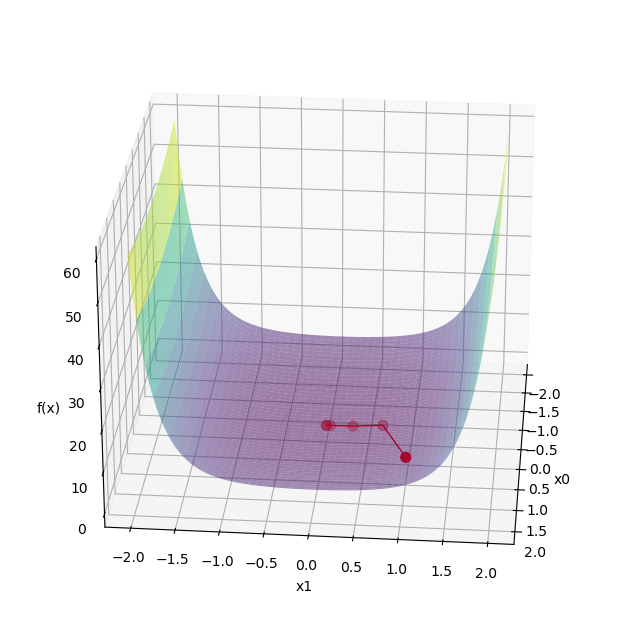

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return x[0]**2 + np.exp(x[1]**2)

def gradient(x):
    dfdx0 = 2 * x[0]
    dfdx1 = 2 * x[1] * np.exp(x[1]**2)
    return np.array([dfdx0, dfdx1])

def hessian(x):
    dfdx1dx1 = 4 * x[1]**2 * np.exp(x[1]**2) + 2 * np.exp(x[1]**2)
    return np.array([[2, 0], [0, dfdx1dx1]])

def newton_method(X0, epsilon):
    x = np.array(X0)
    iteration = 0
    max_iterations = 1000
    x_k = [x.copy()]

    while np.linalg.norm(gradient(x)) > epsilon and iteration < max_iterations:
        print(f"Iteration: {iteration}, x^k = {x_k[-1]}, f(x^k) = {f(x_k[-1])}")
        H_inv = np.linalg.inv(hessian(x))
        x = x - H_inv @ gradient(x)
        x_k.append(x.copy())
        iteration += 1

    return x, iteration, np.array(x_k)

def plot_3d_steps(x_k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
    
    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)
    
    ax.scatter(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", marker="o", s=50)
    
    ax.plot(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", linewidth=1)
    
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("f(x)")
    
    ax.view_init(elev=25, azim=5)
    
    plt.show()

X0 = [1, 1]
epsilon = 1e-9

solution, iterations, x_k = newton_method(X0, epsilon)
print("\nSolution:", solution)
print(f"f(x^k) = {f(solution)}")
print("Number of iterations:", iterations+1)

plot_3d_steps(x_k)


## Задача 3
Из начального приближения $$X^0 = (1, 1)$$ решить задачу безусловной минимизации функции $$f: \mathbb{R}^2 \rightarrow \mathbb{R}, \quad f(x) = x_1^2 + 2x_2^2$$ методом сопряженных градиентов.

Iteration: 0, x^k = [1 1], f(x^k) = 3
Iteration: 1, x^k = [ 0.44444444 -0.11111111], f(x^k) = 0.22222222222222224
Iteration: 2, x^k = [-0.02194787  0.00548697], f(x^k) = 0.0005419228098697695
Iteration: 3, x^k = [-0.02330268  0.00277735], f(x^k) = 0.0005584423285367337
Iteration: 4, x^k = [-0.00140833 -0.00269623], f(x^k) = 1.6522741496394828e-05
Iteration: 5, x^k = [1.00769064e-05 1.40581104e-04], f(x^k) = 3.962763756499717e-08
Iteration: 6, x^k = [0.00011964 0.00011319], f(x^k) = 3.9937325277788025e-08
Iteration: 7, x^k = [ 5.63540933e-05 -1.33724509e-05], f(x^k) = 3.533428716125638e-09
Iteration: 8, x^k = [-2.18177097e-06  1.26151516e-06], f(x^k) = 7.942965573920944e-12
Iteration: 9, x^k = [-2.67006420e-06  2.84928703e-07], f(x^k) = 7.291611576916342e-12
Iteration: 10, x^k = [-1.89329418e-07 -3.35254994e-07], f(x^k) = 2.6063744996778694e-13
Iteration: 11, x^k = [-1.20843954e-08  1.92350517e-08], f(x^k) = 8.860070385828184e-16
Iteration: 12, x^k = [1.42084738e-08 1.26618344e-08], f(x

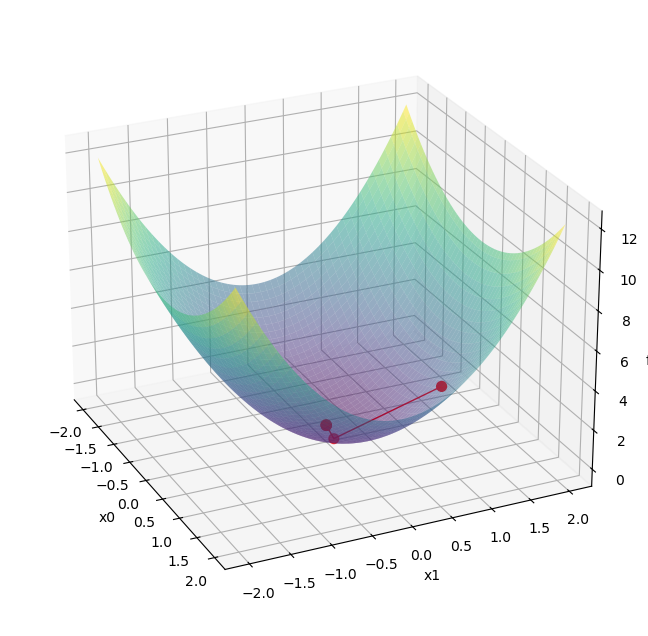

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return x[0]**2 + 2 * x[1]**2

def gradient(x):
    dfdx0 = 2 * x[0]
    dfdx1 = 4 * x[1]
    return np.array([dfdx0, dfdx1])

def conjugate_gradient_method(X0, epsilon):
    x = np.array(X0)
    iteration = 0
    max_iterations = 1000
    x_k = [x.copy()]
    d = -gradient(x)

    while np.linalg.norm(gradient(x)) > epsilon and iteration < max_iterations:
        print(f"Iteration: {iteration}, x^k = {x_k[-1]}, f(x^k) = {f(x_k[-1])}")
        alpha = np.dot(d, d) / np.dot(d, np.dot(hessian(x), d))
        x = x + alpha * d
        beta = np.dot(gradient(x), np.dot(hessian(x), d)) / np.dot(d, np.dot(hessian(x), d))
        d = -gradient(x) + beta * d
        x_k.append(x.copy())
        iteration += 1

    return x, iteration, np.array(x_k)

def hessian(x):
    return np.array([[2, 0], [0, 4]])

def plot_3d_steps(x_k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
    
    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)
    
    ax.scatter(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", marker="o", s=50)
    
    ax.plot(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", linewidth=1)
    
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("f(x)")
    
    ax.view_init(elev=25, azim=-25)
    
    plt.show()

X0 = [1, 1]
epsilon = 1e-9

solution, iterations, x_k = conjugate_gradient_method(X0, epsilon)
print("\nSolution:", solution)
print(f"f(x^k) = {f(solution)}")
print("Number of iterations:", iterations+1)

plot_3d_steps(x_k)


## Задача 4
Из начального приближения $$X^0 = (0, 0)$$ решить задачу нелинейного программирования методом условного градиента, завершая вычисления при $$\|x_{k+1} - x_k\| \leq 0.1$$ $$f(x) = x_1^2 - 4x_1 + x_2^2 - 2x_2 \rightarrow \min,$$
$$
\begin{align*}
& 0 \leq x_1 \leq 1 \\
& 0 \leq x_2 \leq 2
\end{align*}
$$

Iteration: 0, x^k = [0. 0.], f(x^k) = 0.0
Iteration: 1, x^k = [1. 1.], f(x^k) = -4.0

Solution: [1. 1.]
f(x^k) = -4.0
Number of iterations: 2


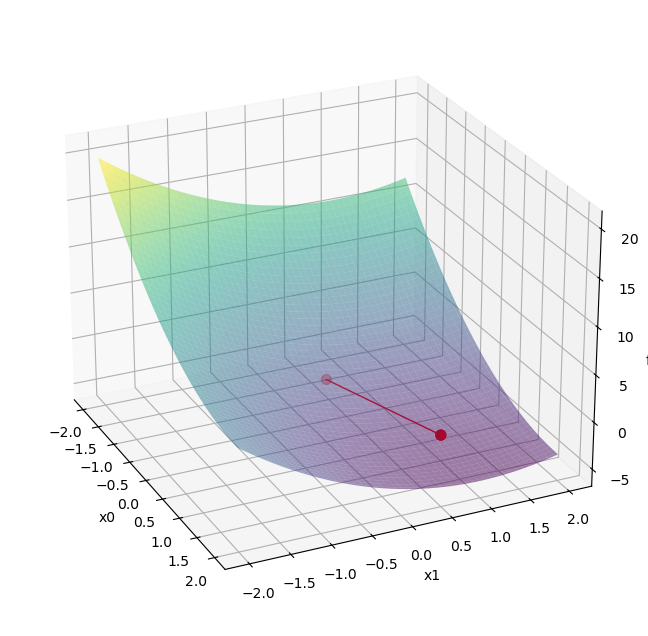

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return x[0]**2 - 4*x[0] + x[1]**2 - 2*x[1]

def gradient(x):
    return np.array([2*x[0] - 4, 2*x[1] - 2])

def projection(x):
    x[0] = 1 if x[0] > 1 else (0 if x[0] < 0 else x[0])
    x[1] = 2 if x[1] > 2 else (0 if x[1] < 0 else x[1])
    return x

def conditional_gradient_method(x0, epsilon):
    x = np.array(x0, dtype=float)
    alpha = 2 / (2 + len(x))
    iteration = 0
    x_k = [x.copy()]

    while True:
        print(f"Iteration: {iteration}, x^k = {x_k[-1]}, f(x^k) = {f(x_k[-1])}")
        grad = gradient(x)
        x_new = projection(x - alpha * grad)
        
        x_k.append(x_new.copy())
        if np.linalg.norm(x_new - x) <= epsilon:
            break
            
        x = x_new
        iteration += 1

    return x, iteration, np.array(x_k)

def plot_3d_steps(x_k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
    
    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)
    
    ax.scatter(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", marker="o", s=50)
    
    ax.plot(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", linewidth=1)
    
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("f(x)")
    
    ax.view_init(elev=25, azim=-25)
    
    plt.show()

x0 = [0, 0]
epsilon = 0.1
solution, iterations, x_k = conditional_gradient_method(x0, epsilon)

print("\nSolution:", solution)
print(f"f(x^k) = {f(solution)}")
print("Number of iterations:", iterations+1)


plot_3d_steps(x_k)


## Задача 5
Решить задачу 
$$
f(x) = 2x_1 + (x_2 - 1)^2 \rightarrow \min \\
$$
$$x \in D, \quad D = \{ x \in \mathbb{R}^2 \mid 2x_1 + x_2 = 0 \}$$
методом квадратичного штрафа.

Iteration: 0, x^k = [0. 0.], f(x^k) = 1.0
Iteration: 1, x^k = [-0.2  0.2], f(x^k) = 0.2400000000000001
Iteration: 2, x^k = [-0.44  0.32], f(x^k) = -0.4176000000000001
Iteration: 3, x^k = [-0.752  0.344], f(x^k) = -1.0736640000000002
Iteration: 4, x^k = [-1.184   0.2432], f(x^k) = -1.7952537600000005
Iteration: 5, x^k = [-1.80896 -0.0304 ], f(x^k) = -2.556195840000001
Iteration: 6, x^k = [-2.738624 -0.553984], f(x^k) = -3.0623817277440004

Solution: [-2.738624 -0.553984]
Objective function value at solution: -3.0623817277440004
Number of iterations: 7


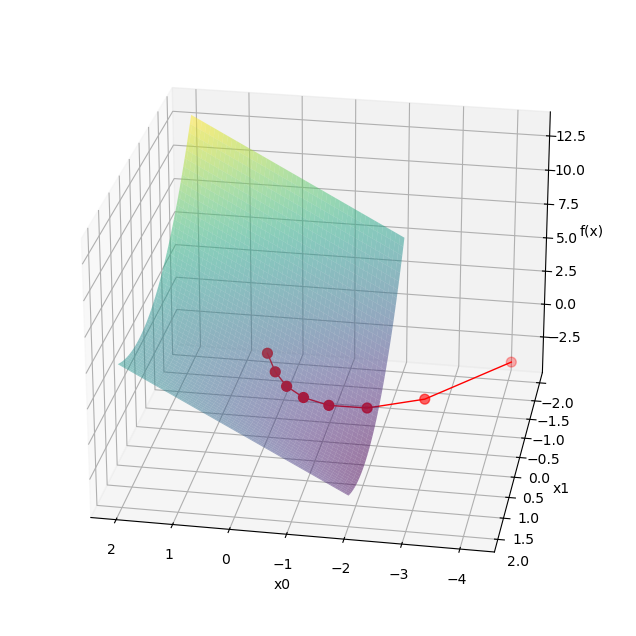

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return 2 * x[0] + (x[1] - 1)**2

def g(x):
    return 2 * x[0] + x[1]

def penalty_function(x, mu):
    return f(x) + 0.5 / mu * g(x)**2

def gradient_penalty_function(x, mu):
    dfdx0 = 2 - g(x) / mu
    dfdx1 = 2 * (x[1] - 1) - g(x) / mu
    return np.array([dfdx0, dfdx1])

def gradient_descent_penalty_method(X0, mu, epsilon, learning_rate):
    x = np.array(X0, dtype=float)
    iteration = 0
    max_iterations = 1000
    x_k = [x.copy()]

    while iteration < max_iterations:
        print(f"Iteration: {iteration}, x^k = {x_k[-1]}, f(x^k) = {f(x_k[-1])}")
        grad = gradient_penalty_function(x, mu)
        x_new = x - learning_rate * grad
        x_k.append(x_new.copy())

        if np.linalg.norm(x_new - x) <= epsilon or f(x_new) >= f(x):
            break

        x = x_new
        iteration += 1

    return x, iteration, np.array(x_k)

def plot_3d_steps(x_k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
    
    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.5)
    
    ax.scatter(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", marker="o", s=50)
    
    ax.plot(x_k[:, 0], x_k[:, 1], f(x_k.T), color="red", linewidth=1)
    
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("f(x)")
    
    ax.view_init(elev=25, azim=100)
    
    plt.show()

X0 = [0, 0]
mu = 0.5
epsilon = 1e-9
learning_rate = 0.1

solution, iterations, x_k = gradient_descent_penalty_method(X0, mu, epsilon, learning_rate)
print("\nSolution:", solution)
print("Objective function value at solution:", f(solution))
print("Number of iterations:", iterations+1)

plot_3d_steps(x_k)
